In [1]:
import tensorflow as tf

/Users/bp/anaconda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/bp/anaconda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/bp/anaconda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/bp/anaconda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:529: Futu

In [2]:
from tensorflow import keras

In [3]:
import matplotlib
import matplotlib.pyplot as plt

In [4]:
tf.__version__

'1.13.1'

In [5]:
keras.__version__

'2.2.4-tf'

In [6]:
fashion_mnist = keras.datasets.fashion_mnist

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [7]:
type(X_train_full)

numpy.ndarray

In [8]:
X_train_full[:3]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

In [9]:
y_train_full[:3]

array([9, 0, 0], dtype=uint8)

In [10]:
X_train_full.shape

(60000, 28, 28)

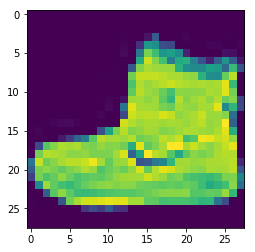

In [11]:
some_pic = X_train_full[0]
some_pic_image = some_pic.reshape(28,28)
plt.imshow(some_pic_image)
plt.show()

In [12]:
#create validation data as well, plus scaling down x values from 1-255 to 0-1 scale
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [13]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names[y_train[0]]

'Coat'

In [14]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

Instructions for updating:
Colocations handled automatically by placer.


In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.layers

In [17]:
model.layers[1].name


'dense'

In [18]:
weights, biases = model.layers[1].get_weights()

In [19]:
weights

array([[ 0.00824816,  0.01587024,  0.0736848 , ...,  0.0016951 ,
        -0.03393587,  0.07236654],
       [-0.05926446, -0.04319531, -0.05866531, ...,  0.00636724,
         0.01464812,  0.02312351],
       [ 0.06181125, -0.0375049 , -0.03751718, ..., -0.030186  ,
        -0.06084795, -0.04475248],
       ...,
       [-0.07399986,  0.00296295,  0.02871981, ..., -0.01898358,
        -0.01834582,  0.0469055 ],
       [-0.02412297,  0.03298624, -0.01986672, ..., -0.01311959,
        -0.0402382 ,  0.02645228],
       [-0.04439185,  0.04327182, -0.06477626, ..., -0.06782567,
        -0.05359065,  0.04698227]], dtype=float32)

In [20]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [21]:
history = model.fit(X_train, y_train, epochs=30,validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 3s 55us/sample - loss: 0.7263 - acc: 0.7606 - val_loss: 0.5376 - val_acc: 0.8100
Epoch 2/30
55000/55000 [==============================] - 3s 53us/sample - loss: 0.4900 - acc: 0.8289 - val_loss: 0.4399 - val_acc: 0.8518
Epoch 3/30
55000/55000 [==============================] - 3s 54us/sample - loss: 0.4438 - acc: 0.8446 - val_loss: 0.4353 - val_acc: 0.8484
Epoch 4/30
55000/55000 [==============================] - 3s 56us/sample - loss: 0.4160 - acc: 0.8541 - val_loss: 0.4139 - val_acc: 0.8578
Epoch 5/30
55000/55000 [==============================] - 3s 56us/sample - loss: 0.3960 - acc: 0.8604 - val_loss: 0.3878 - val_acc: 0.8622
Epoch 6/30
55000/55000 [==============================] - 3s 60us/sample - loss: 0.3792 - acc: 0.8659 - val_loss: 0.3750 - val_acc: 0.8684
Epoch 7/30
55000/55000 [==============================] - 3s 59us/sample - loss: 0.3660 - acc: 0.8706 - val_loss: 0.3

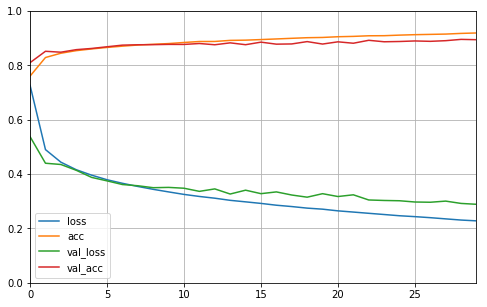

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [23]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 21us/sample - loss: 2.4635 - acc: 0.8447


[2.4634568315505954, 0.8447]

In [24]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [25]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)